<a href="https://colab.research.google.com/github/Rjsmart0621/lPyLZgQ6IdQNBvvp/blob/main/AZPIRVA_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = drive.mount('/content/ACME-HappinessSurvey2020.xlsx')

Mounted at /content/ACME-HappinessSurvey2020.xlsx


In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
#To scale the data using z-score
from sklearn.preprocessing import StandardScaler
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive

In [ ]:
data = pd.read_csv('/content/ACME-HappinessSurvey2020.csv')

In [ ]:
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


Goal(s): Predict if a customer is happy or not based on the answers they give to questions asked.

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
X1 = my order was delivered on time
X2 = contents of my order was as I expected
X3 = I ordered everything I wanted to order
X4 = I paid a good price for my order
X5 = I am satisfied with my courier
X6 = the app makes ordering easy for me

In [ ]:
data.isnull()

,Y,X1,X2,X3,X4,X5,X6
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
121,False,False,False,False,False,False,False
122,False,False,False,False,False,False,False
123,False,False,False,False,False,False,False
124,False,False,False,False,False,False,False


In [ ]:
data.mean()

,0
Y,0.547619
X1,4.333333
X2,2.531746
X3,3.309524
X4,3.746032
X5,3.650794
X6,4.253968


In [ ]:
data.median()

,0
Y,1.0
X1,5.0
X2,3.0
X3,3.0
X4,4.0
X5,4.0
X6,4.0


In [ ]:
data.mode()

,Y,X1,X2,X3,X4,X5,X6
0,1,5,3,3,4,4,5


The mode of the Y data is 1 so more customers are most often happy than not

In [ ]:
data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


126 entries means 126 people answered the survey non-null Means they all answered and none left it blank

##Univariate Analysis

Analysis of customer ratings overall

In [ ]:
mean = data['Y'].mean()

In [ ]:
median = data['Y'].median()

In [ ]:
mode = data['Y'].mode()

In [ ]:
std_dev = data['Y'].std()

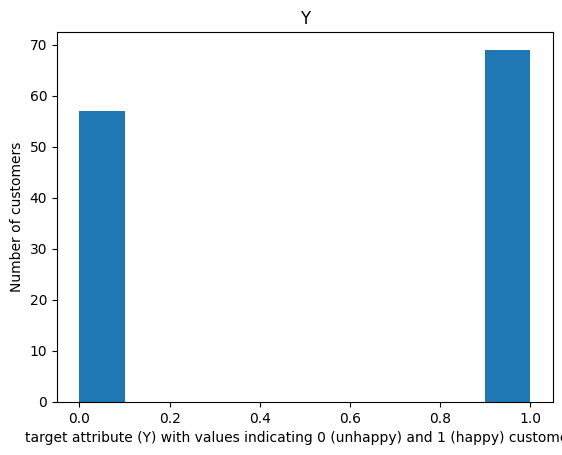

In [ ]:
plt.hist(data['Y'])
plt.title('Y')
plt.xlabel('target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers ')
plt.ylabel('Number of customers')
plt.show()

About 55 participants were unhappy and about 70 participants were happy

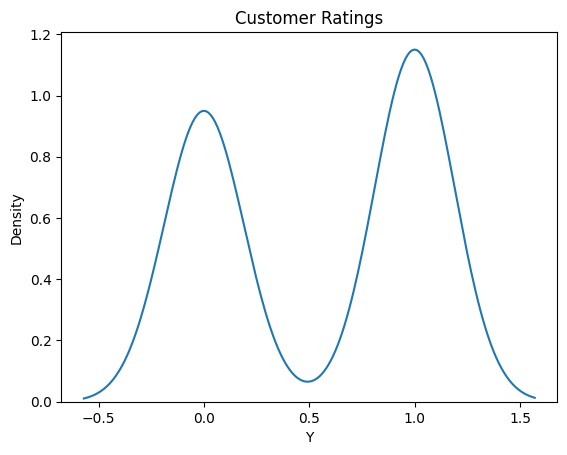

In [ ]:
sns.kdeplot(data['Y'])
plt.title('Customer Ratings')
plt.show()

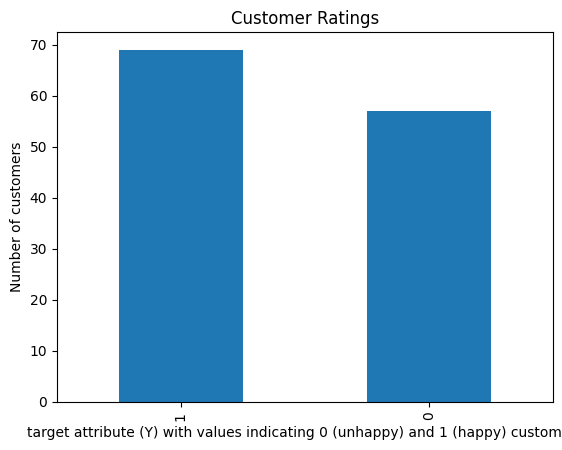

In [ ]:
data['Y'].value_counts().plot(kind='bar')
plt.title('Customer Ratings')
plt.xlabel('target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers')
plt.ylabel('Number of customers')
plt.show()

##Bivariate Analysis

Analysis of satisfaction due to order was delivered on time

3/4 participants were happy that their stuff was delivered on time

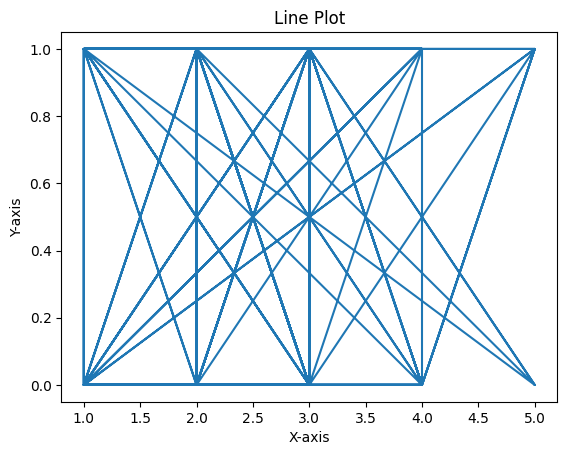

In [ ]:
x = data['X2']
y = data['Y']
plt.plot(x, y)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Line Plot")
plt.show()

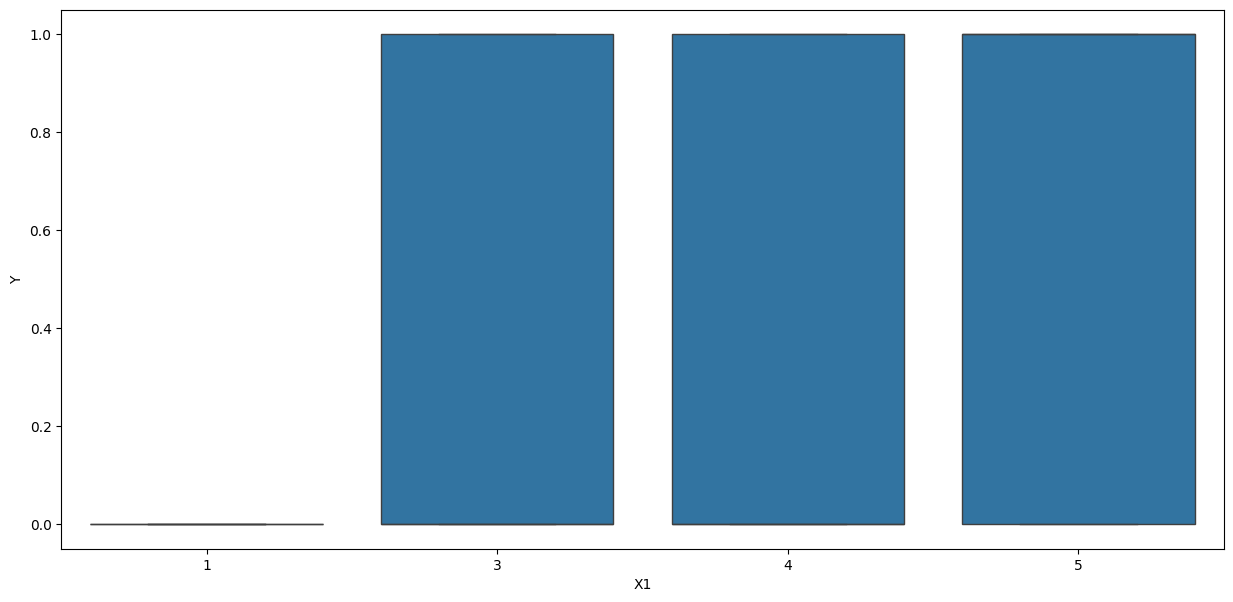

In [ ]:

plt.figure(figsize=(15,7))
sns.boxplot(data=df, x=data['X1'], y=data['Y'])
plt.show()

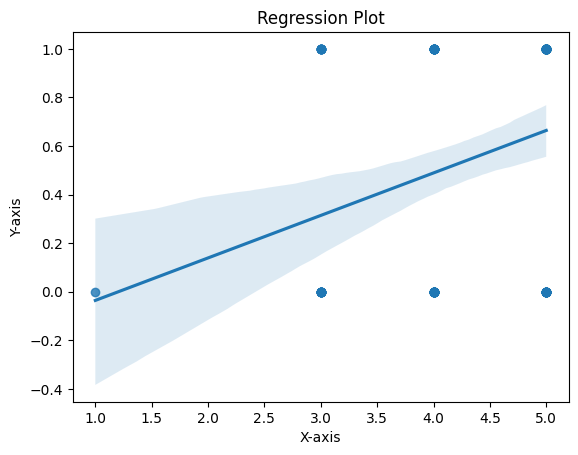

In [ ]:
sns.regplot(x=data['X1'], y=data['Y'])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Regression Plot")
plt.show()

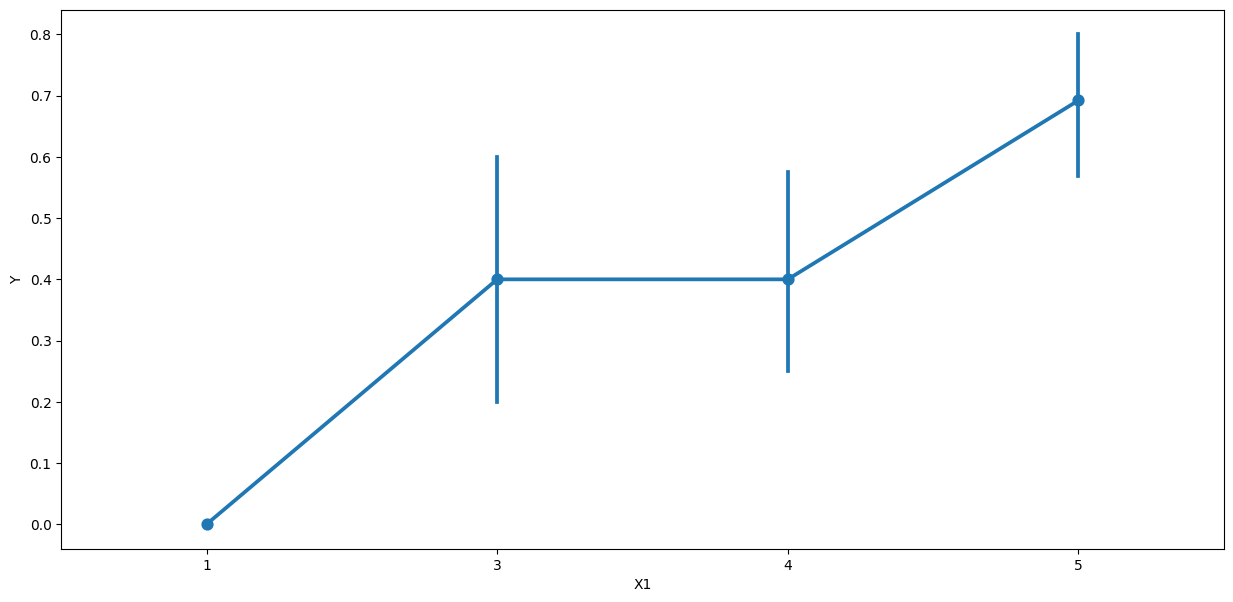

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = data['X1'], y = data['Y'], data = data)
plt.show()

Analysis of satisfaction due to contents of my order was as I expected were nice

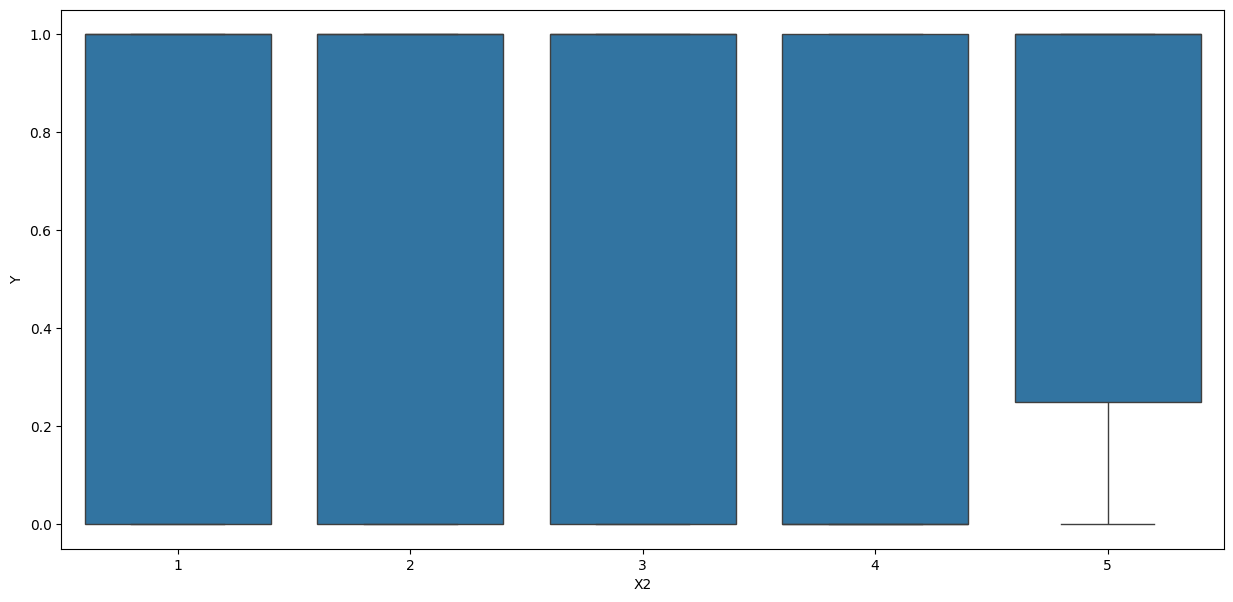

In [ ]:


plt.figure(figsize=(15,7))
sns.boxplot(data=df, x=data['X2'], y=data['Y'])
plt.show()

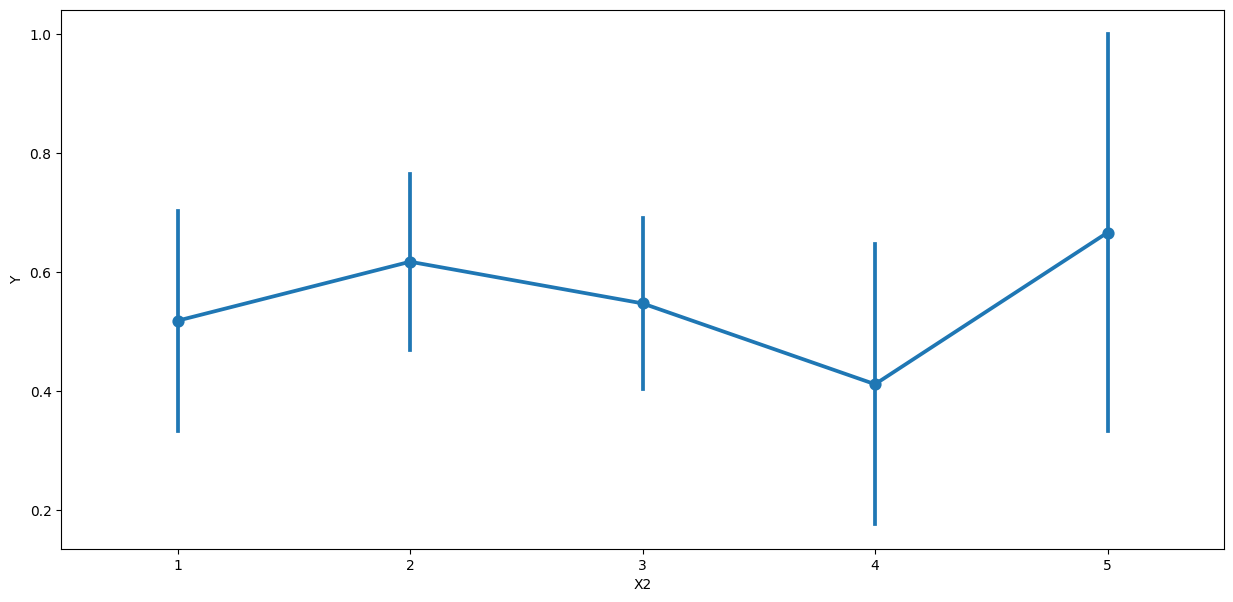

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'X2', y = 'Y', data = data)
plt.show()

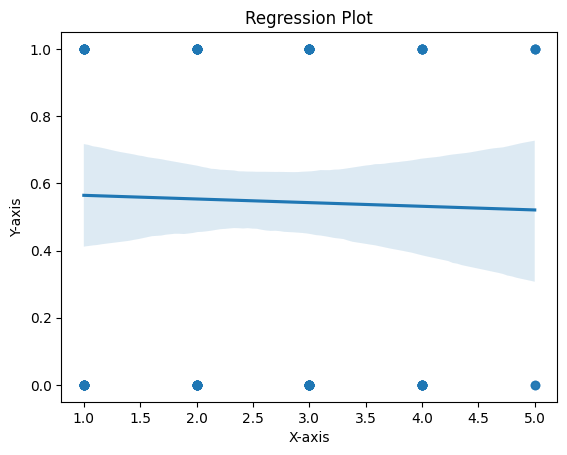

In [ ]:
sns.regplot(x=data['X2'], y=data['Y'])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Regression Plot")
plt.show()

Analysis of satisfaction due to them ordering everything they wanted to order

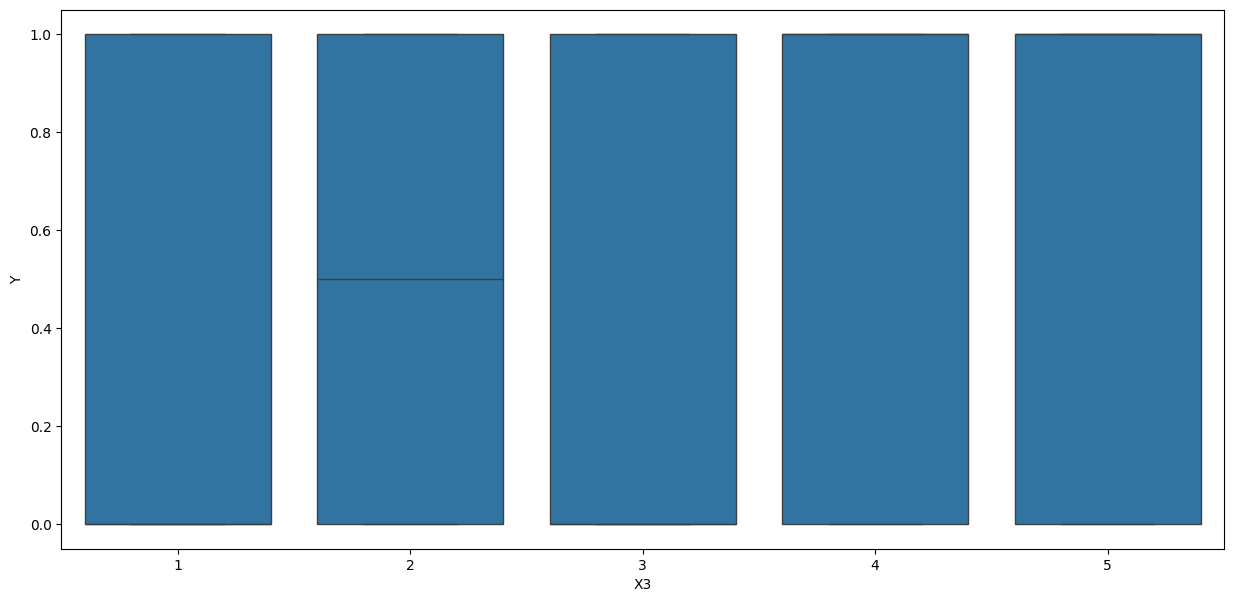

In [ ]:

plt.figure(figsize=(15,7))
sns.boxplot(data=df, x=data['X3'], y=data['Y'])
plt.show()

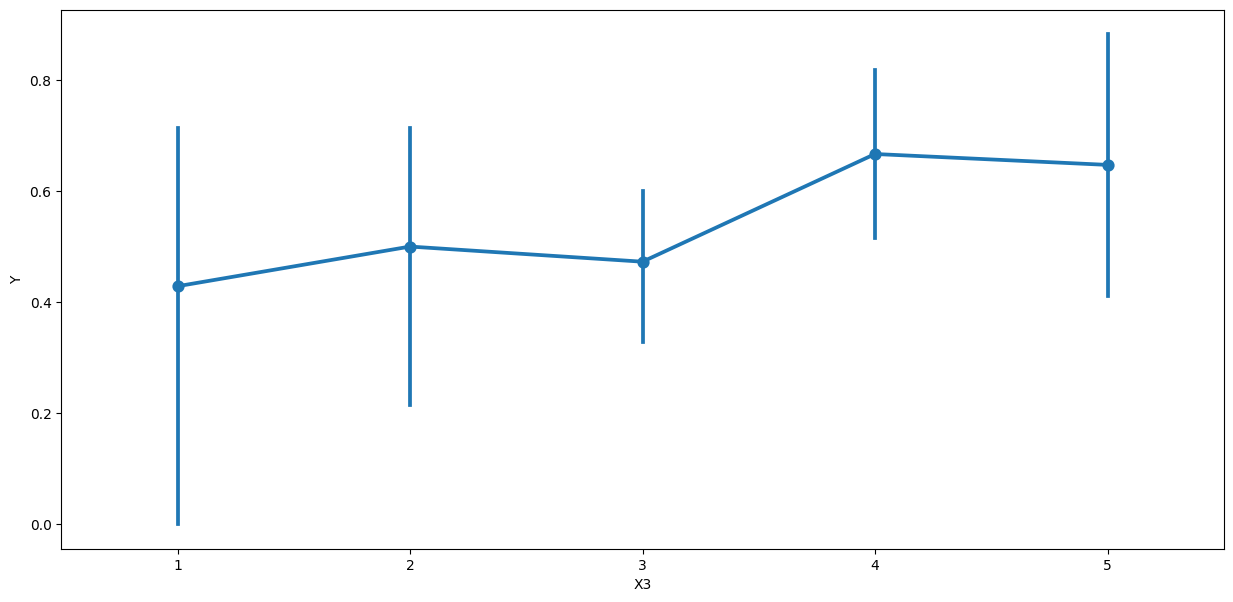

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = data['X3'], y = data['Y'], data = data)
plt.show()

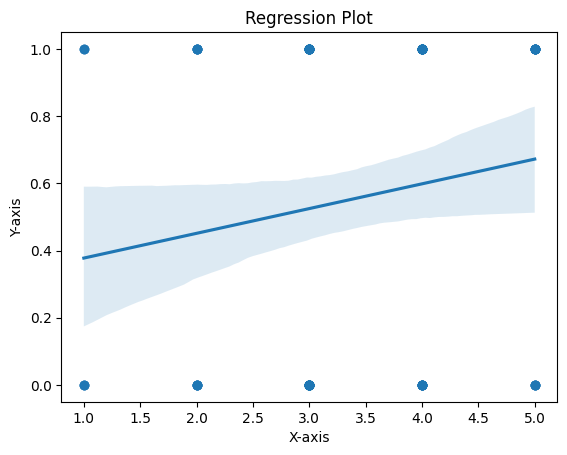

In [ ]:

sns.regplot(x=data['X3'], y=data['Y'])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Regression Plot")
plt.show()

Analysis of satisfaction due to They paid a good price for their order

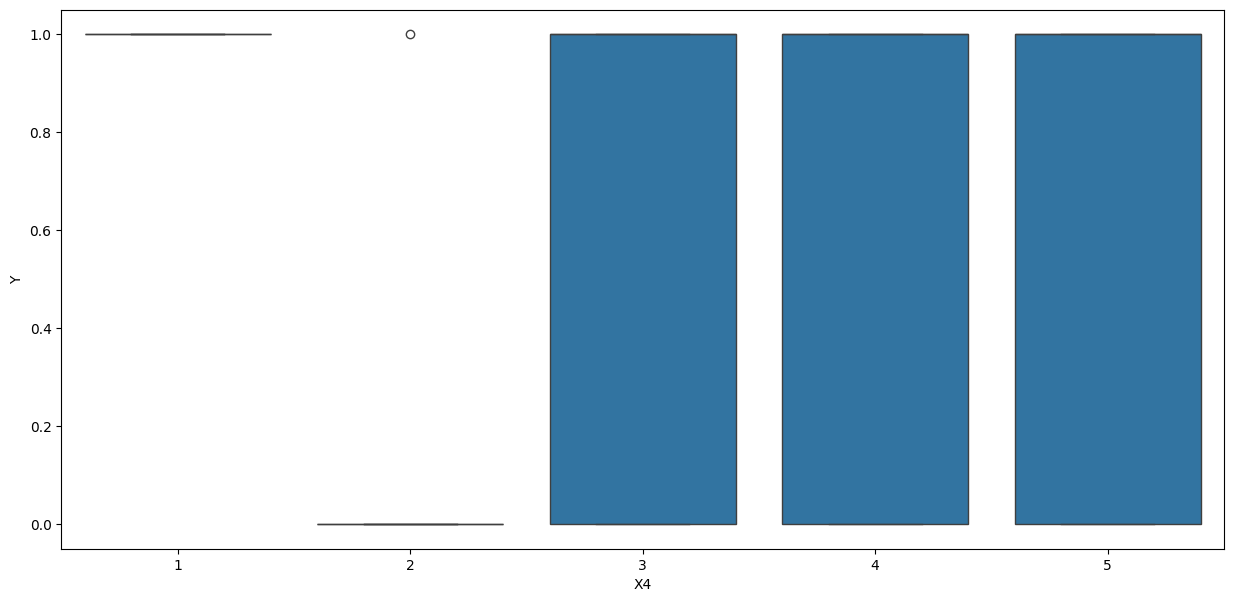

In [ ]:


plt.figure(figsize=(15,7))
sns.boxplot(data=df, x=data['X4'], y=data['Y'])
plt.show()

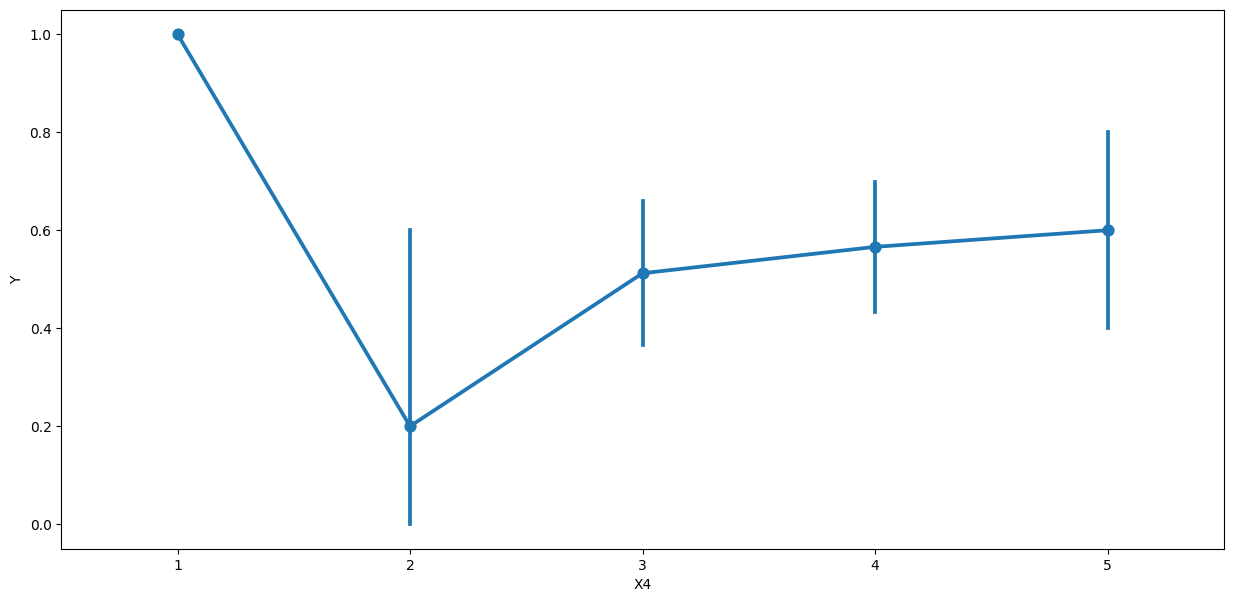

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = data['X4'], y = data['Y'], data = data)
plt.show()

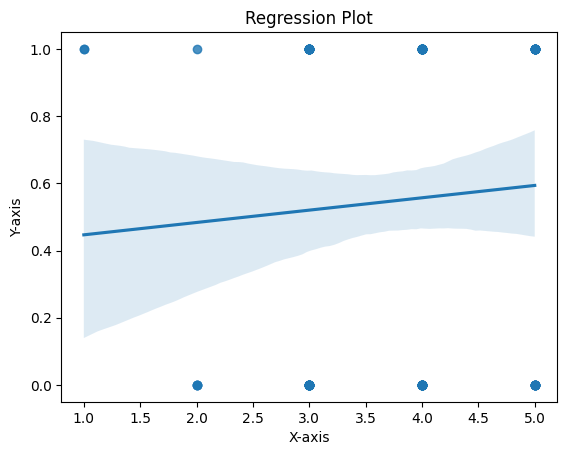

In [ ]:
sns.regplot(x=data['X4'], y=data['Y'])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Regression Plot")
plt.show()

Analysis of satisfaction due to they are satisfied with their courier

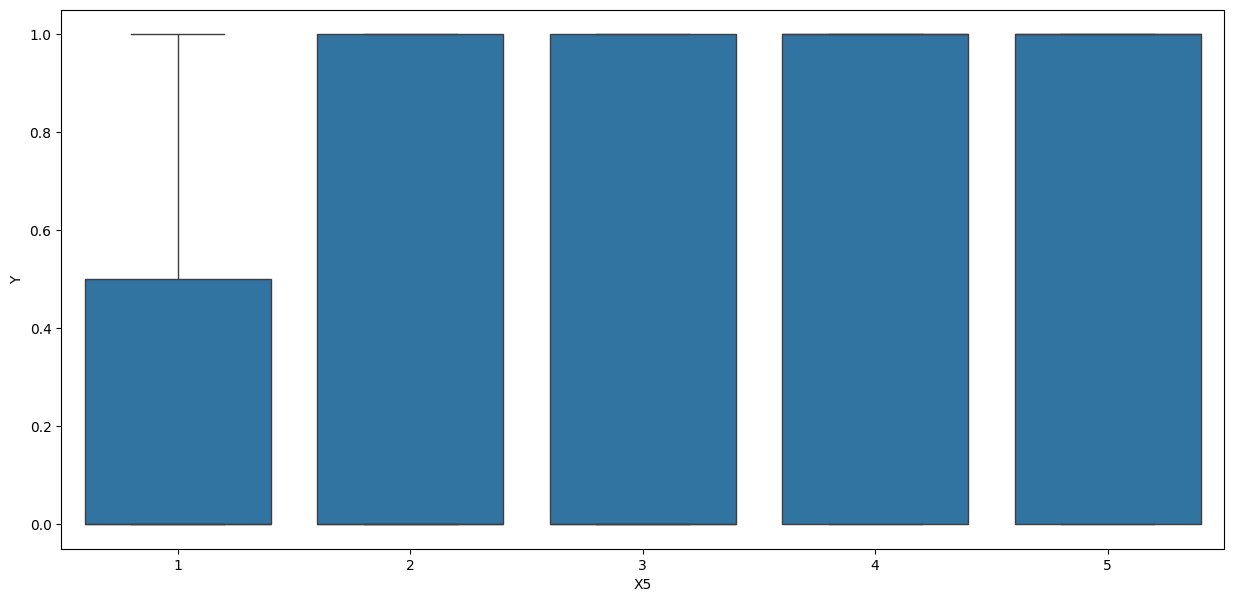

In [ ]:


plt.figure(figsize=(15,7))
sns.boxplot(data=df, x=data['X5'], y=data['Y'])
plt.show()

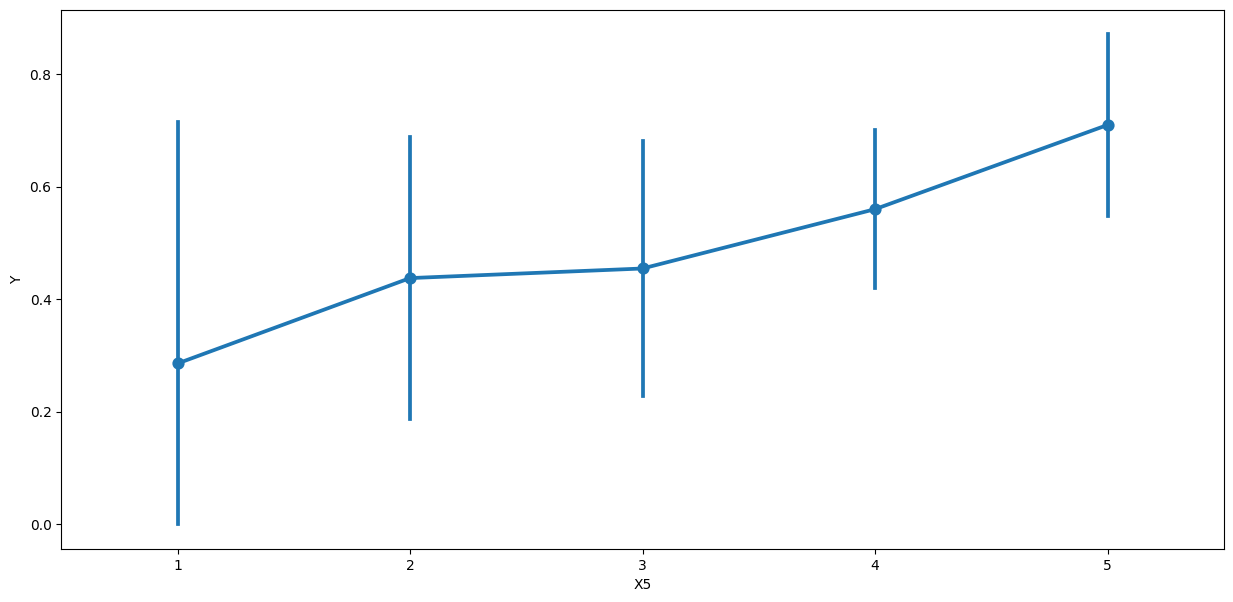

In [ ]:
plt.figure(figsize=(15,7))
sns.pointplot(data=df, x=data['X5'], y=data['Y'])
plt.show()

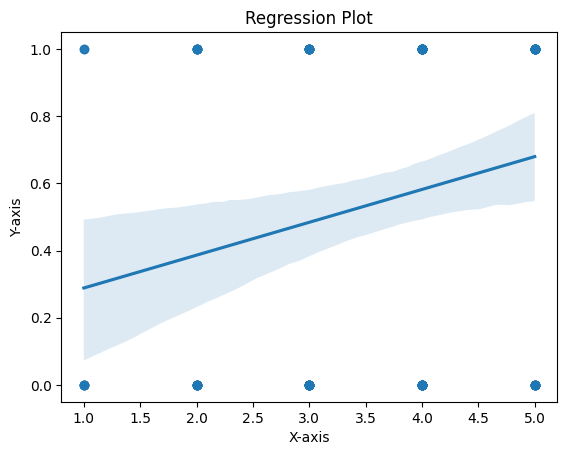

In [ ]:
sns.regplot(x=data['X5'], y=data['Y'])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Regression Plot")
plt.show()

Analysis of satisfaction due to  the app makes ordering easy for them

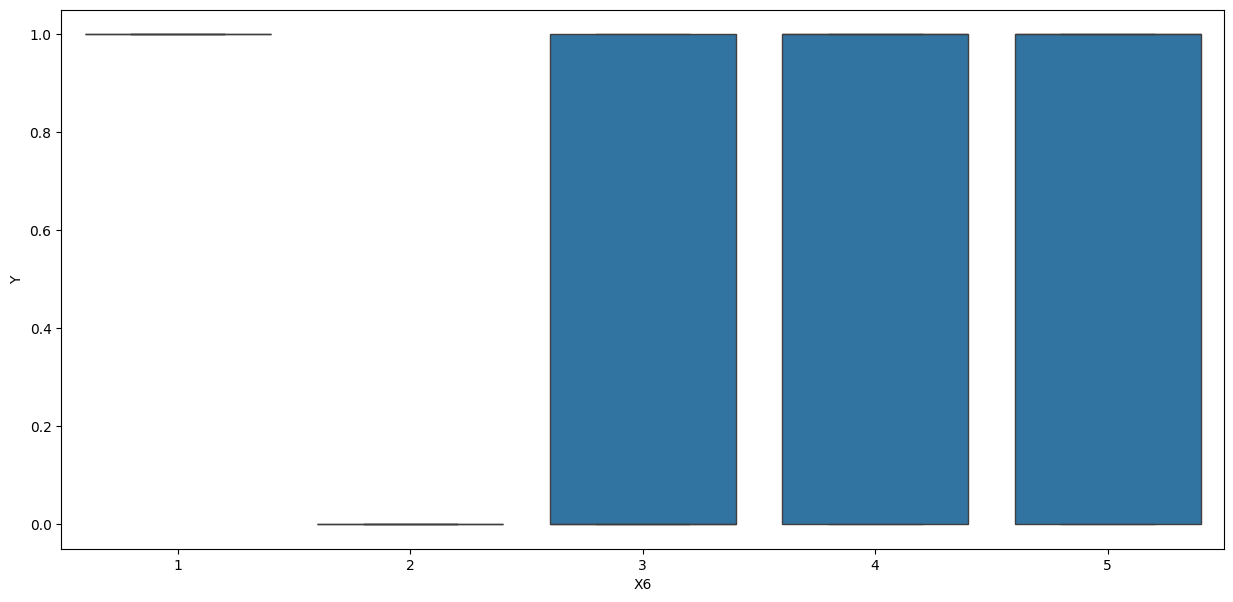

In [ ]:


plt.figure(figsize=(15,7))
sns.boxplot(data=df, x=data['X6'], y=data['Y'])
plt.show()

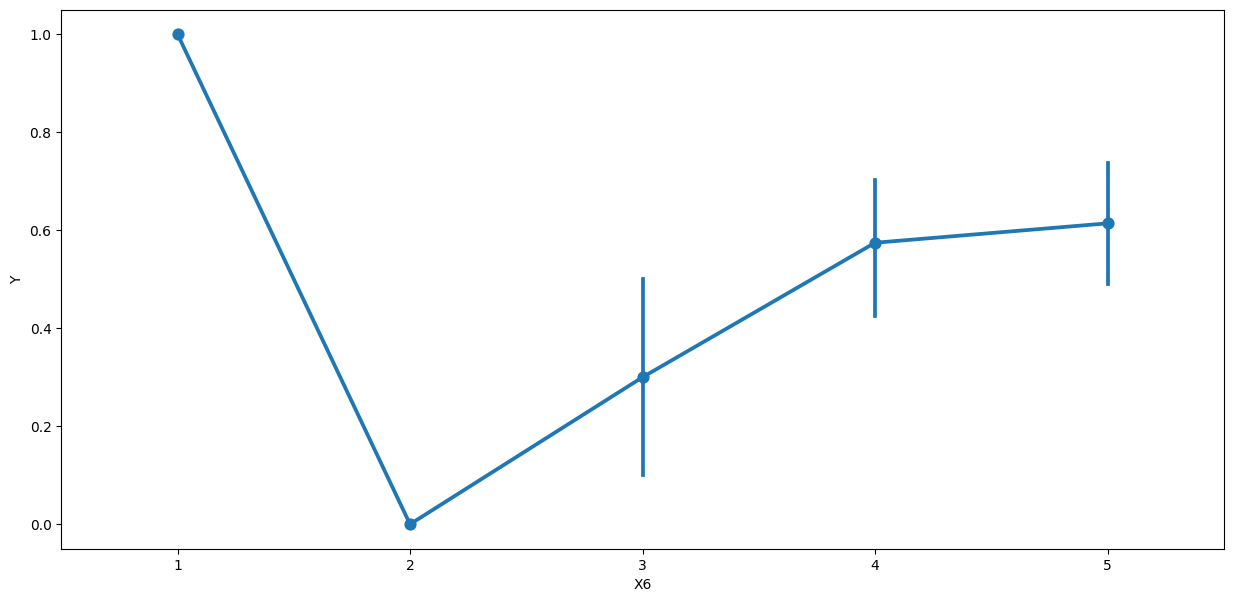

In [ ]:
plt.figure(figsize=(15,7))
sns.pointplot(data=df, x=data['X6'], y=data['Y'])
plt.show()

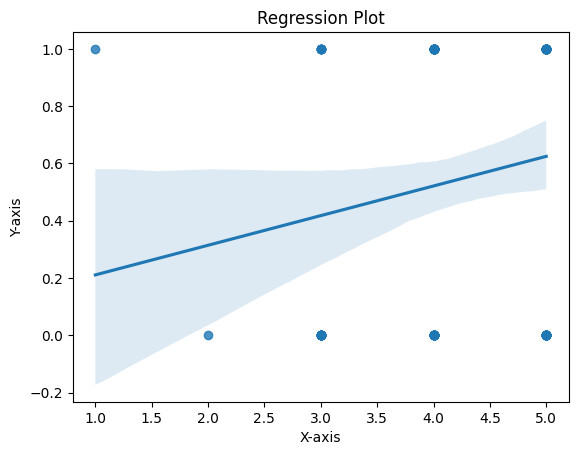

In [ ]:
sns.regplot(x=data['X6'], y=data['Y'])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Regression Plot")
plt.show()

Cumulative results

In [ ]:
# Load the diabetes dataset

X=data['X4']
Y=data['Y']

In [ ]:

# Convert the target variable to binary (1 for diabetes, 0 for no diabetes)
y_binary = (y > np.median(y)).astype(int)

In [ ]:
# split the train and test dataset
X_train, X_test,\
    y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(data[['X4']],data['Y'])

LogisticRegression()

In [ ]:
predictions = model.predict(data[['X4']])
print(predictions)

[1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]


In [ ]:
model.fit(data[['X1']],data['Y'])

LogisticRegression()

In [ ]:
prediction = model.predict(data[['X1']])
print(prediction)

[0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1
 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1
 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1]


In [ ]:
model.fit(data[['X3']],data['Y'])

LogisticRegression()

In [ ]:
prediction = model.predict(data[['X3']])
print(prediction)

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0]


In [ ]:
model.fit(data[['X2']],data['Y'])

LogisticRegression()

In [ ]:
prediction = model.predict(data[['X2']])
print(prediction)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y_binary, test_size=0.4, random_state=42)

In [ ]:
# create logistic regression object
reg = linear_model.LogisticRegression()

In [ ]:
# train the model using the training sets
reg.fit(data[['X2']], data['Y'])

LogisticRegression()

In [ ]:
Pred = reg.predict(data[['X2']])
print(Pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


##Conclusions:##
After doing the analysis my conclusions is it might be important to use tester variables like nunique() in your data analysis venture because you get to know important info like ow many values are unique or used multiple times. You also get to use values df.info() and df.shape(). Overall its imporant to know these information to know what and how to graph things during univariant and multivariant analysis. From the analysis via the datapype, the isnull() and the nunique is import.

What I learned in the second round of Data analysis the univariant data analysis is that the data itself was ploted a simple variable was analysed and I got to see how that variable compared to things overall. mean(), median(), mode() were all found as well as boxplot, linplon and ect chosen to plot things

The third is multivarian analysis. This type of analsis was imporant because it helped to determine one variable compared to another so it was like an x and a y

##Recommendations:##
Overall is was a great. Overall I would recommend the use of more graphs in the multivariate analysis over the univariate analysis so that it is easier to come to a conclusion about how the information compares.